C:\Users\gaura\AppData\Local\Temp\ipykernel_13660\3197196676.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




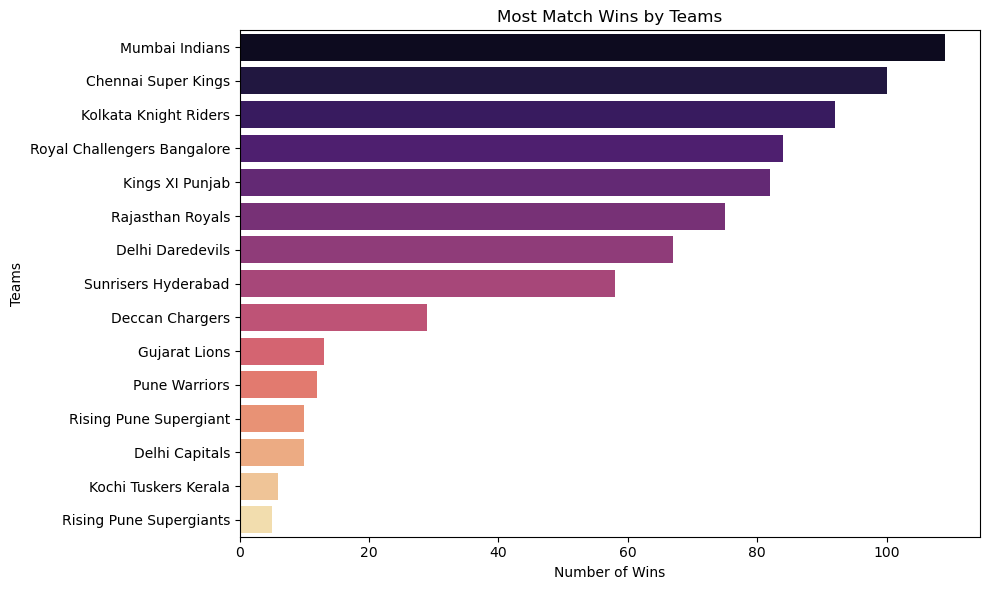

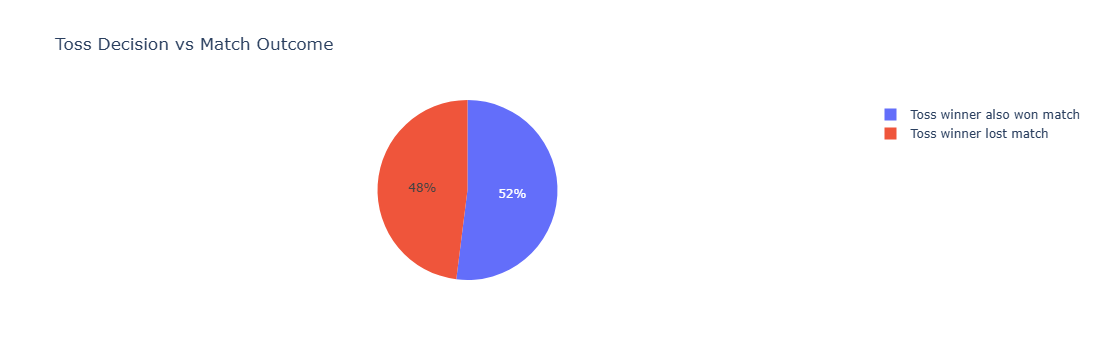

C:\Users\gaura\AppData\Local\Temp\ipykernel_13660\3197196676.py:60: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




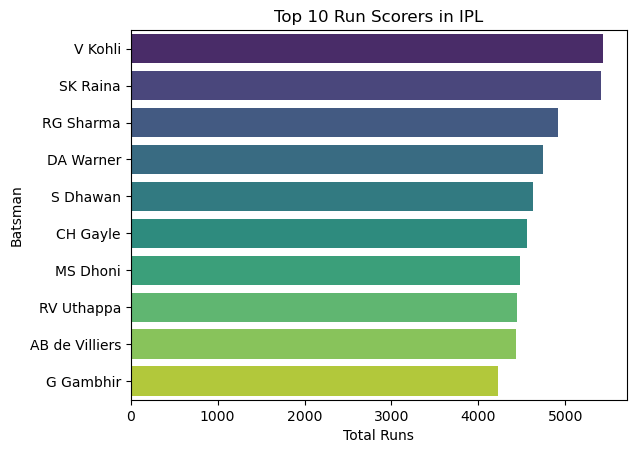

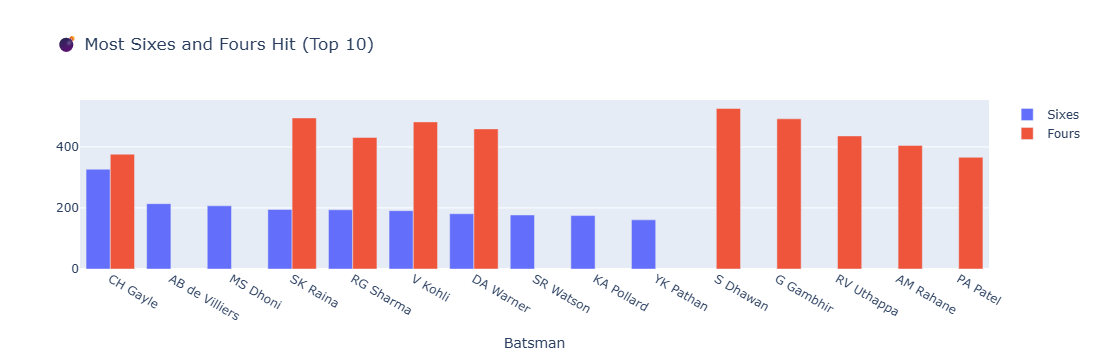

C:\Users\gaura\AppData\Local\Temp\ipykernel_13660\3197196676.py:109: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




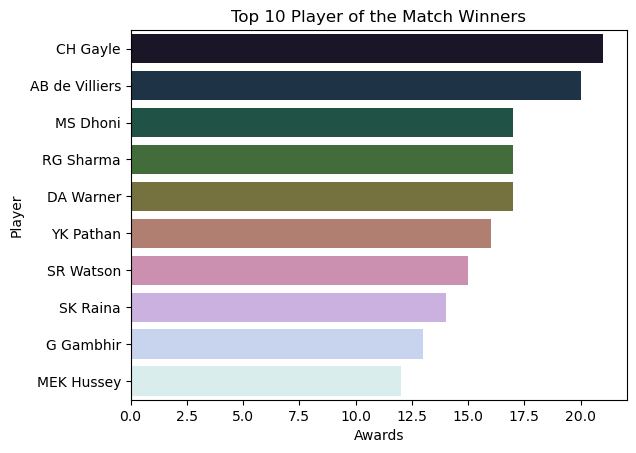

In [6]:

# Step 1: Import Libraries & Load Datasets
# Import necessary libraries for data manipulation and visualization
# Load IPL match-level and ball-by-ball delivery datasetsimport pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Load datasets
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

# Step 2: Most Match Wins by Teams
# Count the number of matches won by each team and visualize using a horizontal bar plot

# Count match wins for each team
team_wins = matches['winner'].value_counts().reset_index()
team_wins.columns = ['Team', 'Wins']  # Rename columns for clarity

# Plotting the results using Seaborn
plt.figure(figsize=(10, 6))  # Set figure size
sns.barplot(data=team_wins, y='Team', x='Wins', palette='magma')  # Horizontal bar plot
plt.title('Most Match Wins by Teams')  # Title of the plot
plt.xlabel('Number of Wins')  # X-axis label
plt.ylabel('Teams')  # Y-axis label
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()  # Display the plot

# Step 3: Toss Decision vs Match Outcome
# Analyze whether winning the toss leads to winning the match using a pie chart

# Create a new column: True if toss winner also won the match, else False
matches['toss_win_match_win'] = matches['toss_winner'] == matches['winner']

# Calculate percentage distribution
toss_impact = matches['toss_win_match_win'].value_counts(normalize=True) * 100

# Plot a pie chart to visualize toss impact on match outcome
fig = px.pie(
    values=toss_impact.values,
    names=['Toss winner also won match', 'Toss winner lost match'],
    title='Toss Decision vs Match Outcome'
)
fig.show()

# Step 4: Top 10 Run Scorers in IPL
# Aggregate total runs by each batsman and visualize the top 10 performers

# Group data by batsman and sum their runs, then sort in descending order
top_scorers = (
    deliveries.groupby('batsman')['batsman_runs']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Create a bar plot for the top 10 batsmen
sns.barplot(data=top_scorers, y='batsman', x='batsman_runs', palette='viridis')
plt.title('Top 10 Run Scorers in IPL')  # Title for the plot
plt.xlabel('Total Runs')  # X-axis label
plt.ylabel('Batsman')     # Y-axis label
plt.show()  # Display the plot

# Step 5: Most Sixes and Fours Hit (Top 10 Batsmen)
# Analyze which batsmen have hit the most sixes and fours in IPL matches

# Filter deliveries where batsman scored 6 runs and count top 10 six-hitters
sixes = (
    deliveries[deliveries['batsman_runs'] == 6]['batsman']
    .value_counts()
    .head(10)
    .reset_index()
)
sixes.columns = ['Batsman', 'Sixes']  # Rename columns

# Filter deliveries where batsman scored 4 runs and count top 10 four-hitters
fours = (
    deliveries[deliveries['batsman_runs'] == 4]['batsman']
    .value_counts()
    .head(10)
    .reset_index()
)
fours.columns = ['Batsman', 'Fours']  # Rename columns

# Create a grouped bar chart using Plotly
fig = go.Figure(data=[
    go.Bar(name='Sixes', x=sixes['Batsman'], y=sixes['Sixes']),
    go.Bar(name='Fours', x=fours['Batsman'], y=fours['Fours'])
])

# Update layout for better readability
fig.update_layout(
    barmode='group', 
    title='💣 Most Sixes and Fours Hit (Top 10)', 
    xaxis_title='Batsman'
)
fig.show()

# Step 6: Top 10 Player of the Match Winners
# Identify players who have won the most "Player of the Match" awards in IPL history

# Count Player of the Match awards and get top 10 players
pom = matches['player_of_match'].value_counts().head(10).reset_index()
pom.columns = ['Player', 'Awards']  # Rename columns for clarity

# Create a bar plot to visualize top award winners
sns.barplot(data=pom, y='Player', x='Awards', palette='cubehelix')
plt.title('Top 10 Player of the Match Winners')  # Plot title
plt.xlabel('Awards')  # X-axis label
plt.ylabel('Player')  # Y-axis label
plt.show()  # Display the plot





In [ ]:
# 📆 Step 7: IPL Matches Played Per Season
# Line chart showing how the number of IPL matches varied across seasons

# Count number of matches per season and sort by season
Season_matches = matches['Season'].value_counts().sort_index()

# Plot a line chart to show trend of matches played per season
px.line(
    Season_matches,
    title='📆 IPL Matches Played Per Season',
    labels={'value': 'Matches', 'index': 'Season'}
)
